In [81]:
import zipfile
zip_ref=zipfile.ZipFile('online_retail_II.xlsx.zip')
zip_ref.extractall()
zip_ref.close()

In [82]:
import pandas as pd
import numpy as np

In [83]:
df=pd.read_excel('online_retail_II.xlsx')

In [84]:
df = df.rename(columns={'Customer ID': 'customer_id'})
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,customer_id,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [85]:
df['Price'].isnull().sum()

np.int64(0)

In [86]:
df['Percentage_of_price']=(df['Price']/df['Price'].max())*100
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,customer_id,Country,Percentage_of_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0.027677
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0.026881
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0.026881
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0.008363
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0.004978


In [87]:
df['Half Quantity']=df['Quantity']*0.5
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,customer_id,Country,Percentage_of_price,Half Quantity
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0.027677,6.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0.026881,6.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0.026881,6.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0.008363,24.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0.004978,12.0


In [88]:
df['Quantity_per_price']=df['Quantity']/df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,customer_id,Country,Percentage_of_price,Half Quantity,Quantity_per_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0.027677,6.0,1.726619
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0.026881,6.0,1.777778
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0.026881,6.0,1.777778
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0.008363,24.0,22.857143
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0.004978,12.0,19.200000


In [89]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [90]:
df = df.rename(columns={'Customer ID': 'customer_id'})

In [91]:
latest_date=df['InvoiceDate'].max()
print(latest_date)

2010-12-09 20:01:00


In [92]:
purchases_on_latest_date=df[df['InvoiceDate']==latest_date]
print(purchases_on_latest_date)

       Invoice StockCode                         Description  Quantity  \
525396  538171     22824      3 TIER SWEETHEART GARDEN SHELF         1   
525397  538171     21260                       FIRST AID TIN         3   
525398  538171     22557    PLASTERS IN TIN VINTAGE PAISLEY          1   
525399  538171     22555           PLASTERS IN TIN STRONGMAN         2   
525400  538171     22556      PLASTERS IN TIN CIRCUS PARADE          2   
...        ...       ...                                 ...       ...   
525456  538171     22271                FELTCRAFT DOLL ROSIE         2   
525457  538171     22750        FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751      FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970  PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931              JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  customer_id         Country  \
525396 2010-12-09 20:01:00  35.95      17530.

In [93]:
last_purchase=df.groupby('customer_id')['InvoiceDate'].max().reset_index()
last_purchase

,customer_id,InvoiceDate
0,12346.0,2010-10-04 16:33:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-09-27 14:59:00
3,12349.0,2010-10-28 08:23:00
4,12351.0,2010-11-29 15:23:00
...,...,...
4378,18283.0,2010-11-22 15:30:00
4379,18284.0,2010-10-06 12:31:00
4380,18285.0,2010-02-17 10:24:00
4381,18286.0,2010-08-20 11:57:00


Recency

In [94]:
reference_date=df['InvoiceDate'].max()
last_purchase['Recency']=(reference_date-last_purchase['InvoiceDate']).dt.days
print(last_purchase.head())

   customer_id         InvoiceDate  Recency
0      12346.0 2010-10-04 16:33:00       66
1      12347.0 2010-12-07 14:57:00        2
2      12348.0 2010-09-27 14:59:00       73
3      12349.0 2010-10-28 08:23:00       42
4      12351.0 2010-11-29 15:23:00       10


Frequency

In [95]:
total_frequency=df.groupby('customer_id')['Invoice'].nunique().reset_index()
total_frequency.columns=['customer_id','Frequency']
print(total_frequency.head(10))

   customer_id  Frequency
0      12346.0         15
1      12347.0          2
2      12348.0          1
3      12349.0          4
4      12351.0          1
5      12352.0          2
6      12353.0          1
7      12355.0          1
8      12356.0          3
9      12357.0          2


Monetary

In [96]:
total_money_spent=df.groupby('customer_id')['Price'].sum().reset_index()
total_money_spent.columns=['customer_id','Money spent']
print(total_money_spent.head())

   customer_id  Money spent
0      12346.0       578.36
1      12347.0       162.95
2      12348.0        14.39
3      12349.0       899.49
4      12351.0        49.46


In [97]:
rfm=last_purchase.merge(total_frequency,on='customer_id').merge(total_money_spent,on='customer_id')
print(rfm.head())

   customer_id         InvoiceDate  Recency  Frequency  Money spent
0      12346.0 2010-10-04 16:33:00       66         15       578.36
1      12347.0 2010-12-07 14:57:00        2          2       162.95
2      12348.0 2010-09-27 14:59:00       73          1        14.39
3      12349.0 2010-10-28 08:23:00       42          4       899.49
4      12351.0 2010-11-29 15:23:00       10          1        49.46


In [98]:
rfm['R_score']=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])
rfm['F_score']=pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
rfm['M_score']=pd.qcut(rfm['Money spent'],q=5,labels=[1,2,3,4,5])

In [99]:
rfm['RFM_score']=rfm[['R_score','F_score','M_score']].astype(int).sum(axis=1)

In [100]:
top_customers=rfm.sort_values(by='RFM_score',ascending=False)
print(top_customers[['customer_id','RFM_score']].head().reset_index())

   index  customer_id  RFM_score
0   4233      18075.0         15
1   4360      18260.0         15
2   4348      18245.0         15
3   4205      18041.0         15
4   4156      17975.0         15


In [101]:
def segment_customers(score):
  if score>=11:
    return 'Champions'
  elif score >=10:
    return 'Loyal Buyers'
  elif score >=7:
    return 'Potential loyalist'
  elif score >=4:
    return 'At risk'
  else:
    return 'Lost'

rfm['Segment']=rfm['RFM_score'].apply(segment_customers)

In [102]:
rfm['RFM_score'].value_counts(ascending=True)

,count
RFM_score,
3,184
14,287
13,308
12,311
15,335
4,340
5,348
11,360
10,362


In [103]:
top_customers = rfm[rfm['RFM_score'] == 15]
top_customers.to_csv('top_champions.csv', index=False)
top_customers.head(5)

,customer_id,InvoiceDate,Recency,Frequency,Money spent,R_score,F_score,M_score,RFM_score,Segment
64,12431.0,2010-12-01 10:03:00,8,16,678.53,5,5,5,15,Champions
88,12471.0,2010-12-02 10:37:00,7,81,2763.72,5,5,5,15,Champions
89,12472.0,2010-12-05 14:19:00,4,26,1556.93,5,5,5,15,Champions
90,12474.0,2010-12-06 12:00:00,3,25,966.23,5,5,5,15,Champions
92,12476.0,2010-11-30 11:49:00,9,18,1251.48,5,5,5,15,Champions


In [104]:
print(rfm.columns.tolist())
print(rfm.head())

['customer_id', 'InvoiceDate', 'Recency', 'Frequency', 'Money spent', 'R_score', 'F_score', 'M_score', 'RFM_score', 'Segment']
   customer_id         InvoiceDate  Recency  Frequency  Money spent R_score  \
0      12346.0 2010-10-04 16:33:00       66         15       578.36       3   
1      12347.0 2010-12-07 14:57:00        2          2       162.95       5   
2      12348.0 2010-09-27 14:59:00       73          1        14.39       2   
3      12349.0 2010-10-28 08:23:00       42          4       899.49       3   
4      12351.0 2010-11-29 15:23:00       10          1        49.46       5   

  F_score M_score  RFM_score             Segment  
0       5       5         13           Champions  
1       2       3         10        Loyal Buyers  
2       1       1          4             At risk  
3       3       5         11           Champions  
4       1       2          8  Potential loyalist  


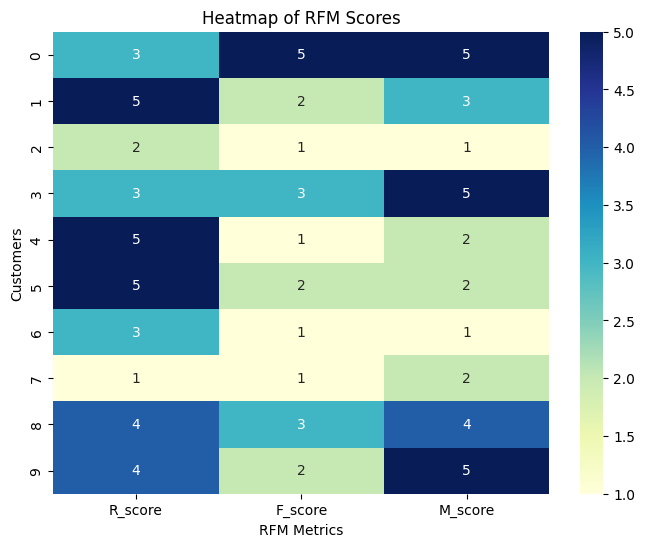

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Select score columns with exact names
scores = rfm[['R_score', 'F_score', 'M_score']].head(10).astype(int)

sns.heatmap(scores, annot=True, cmap='YlGnBu')

plt.title('Heatmap of RFM Scores')
plt.xlabel('RFM Metrics')
plt.ylabel('Customers')

plt.show()
